In [1]:
import pandas as pad
import numpy as nup
import glob
import soundfile
import os
import sys

In [2]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [3]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import glob
import os
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [4]:
from IPython.display import Audio

In [5]:
import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
DataSet="/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/"

In [8]:
DataSetDirectoryList=os.listdir(DataSet)
fileEmotion=[]
filePath=[]
for dir in DataSetDirectoryList:
  actor=os.listdir(DataSet+dir)
  for file in actor:
    part=file.split('.')[0]
    part=part.split('-')
    fileEmotion.append(int(part[2]))
    filePath.append(DataSet+dir+'/'+file)
emotion_df=pad.DataFrame(fileEmotion,columns=['Emotions'])
path_df=pad.DataFrame(filePath,columns=['Path'])
DataSet_df=pad.concat([emotion_df,path_df],axis=1)


In [9]:
DataSet_df.Emotions.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgusted'},inplace=True)
DataSet_df.head(6)

,Emotions,Path
0,calm,/content/drive/MyDrive/speech-emotion-recognit...
1,neutral,/content/drive/MyDrive/speech-emotion-recognit...
2,neutral,/content/drive/MyDrive/speech-emotion-recognit...
3,neutral,/content/drive/MyDrive/speech-emotion-recognit...
4,calm,/content/drive/MyDrive/speech-emotion-recognit...
5,neutral,/content/drive/MyDrive/speech-emotion-recognit...


In [10]:
dataPath=pad.concat([DataSet_df],axis=0)
dataPath.to_csv("data_path.csv",index=False)
dataPath.Emotions.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgusted'},inplace=True)
dataPath.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/speech-emotion-recognit...
1,neutral,/content/drive/MyDrive/speech-emotion-recognit...
2,neutral,/content/drive/MyDrive/speech-emotion-recognit...
3,neutral,/content/drive/MyDrive/speech-emotion-recognit...
4,calm,/content/drive/MyDrive/speech-emotion-recognit...


In [11]:
dataPath['Emotions'] = dataPath['Emotions'].astype('category')

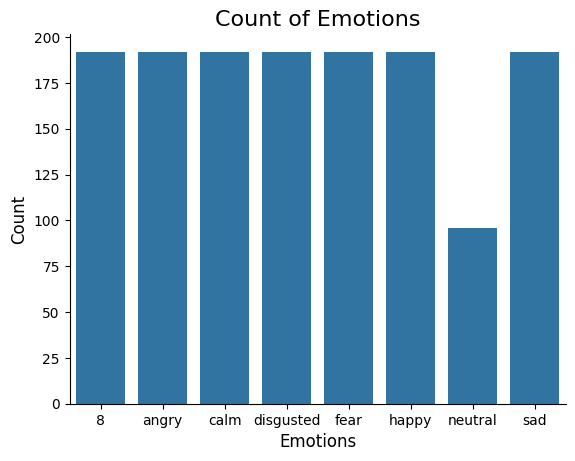

In [12]:
mplt.title('Count of Emotions',size=16)
sbn.countplot(data=dataPath, x='Emotions')
mplt.ylabel('Count',size=12)
mplt.xlabel('Emotions',size=12)
sbn.despine(top=True,right=True,left=False,bottom=False)
mplt.show()


In [13]:
import librosa.display

In [14]:
def createWaveplot(data,sr,e):
  mplt.figure(figsize=(10,3))
  mplt.title('Waveplot for audio with {} emotion '.format(e),size=15)
  librosa.display.waveshow(data,sr=sr)
  mplt.show()

In [15]:
def createSpectrogram(data,sr,e):
  X=librosa.stft(data)
  Xdb=librosa.amplitude_to_db(abs(X))
  mplt.figure(figsize=(12,13))
  mplt.title('Spectogram for audio with {} emotion'.format(e),size=15)
  librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
  mplt.colorbar()

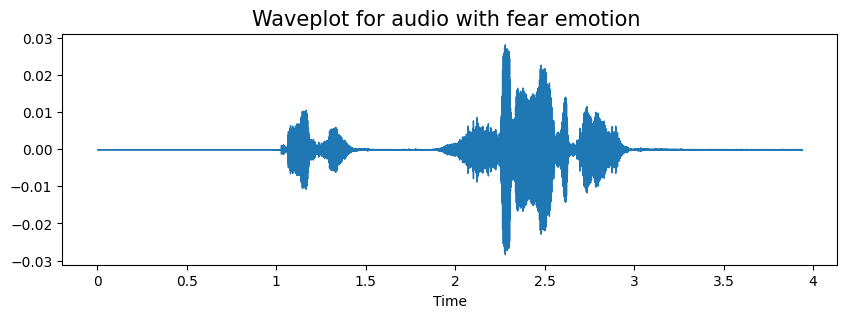

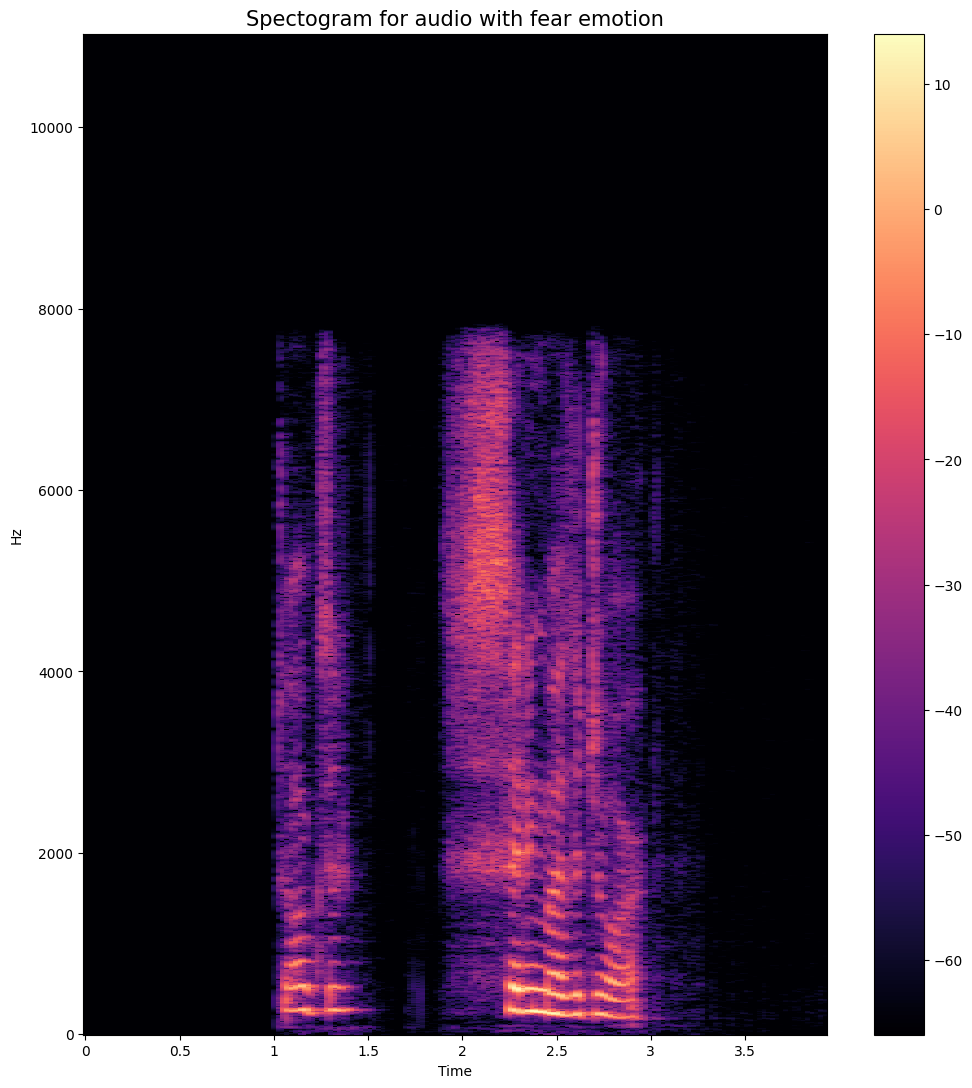

In [16]:

emotion='fear'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWaveplot(data,samplingRate,emotion)
createSpectrogram(data,samplingRate,emotion)
Audio(path)


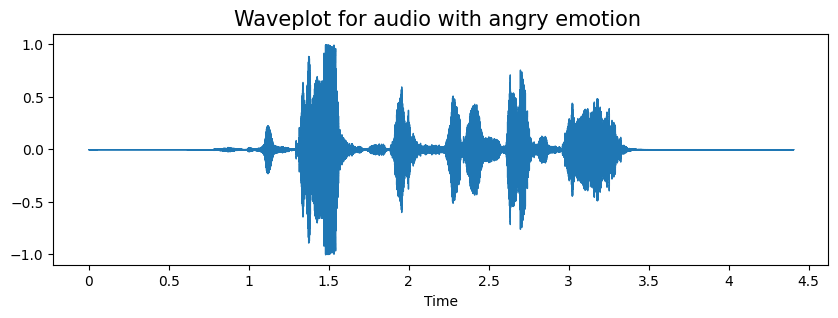

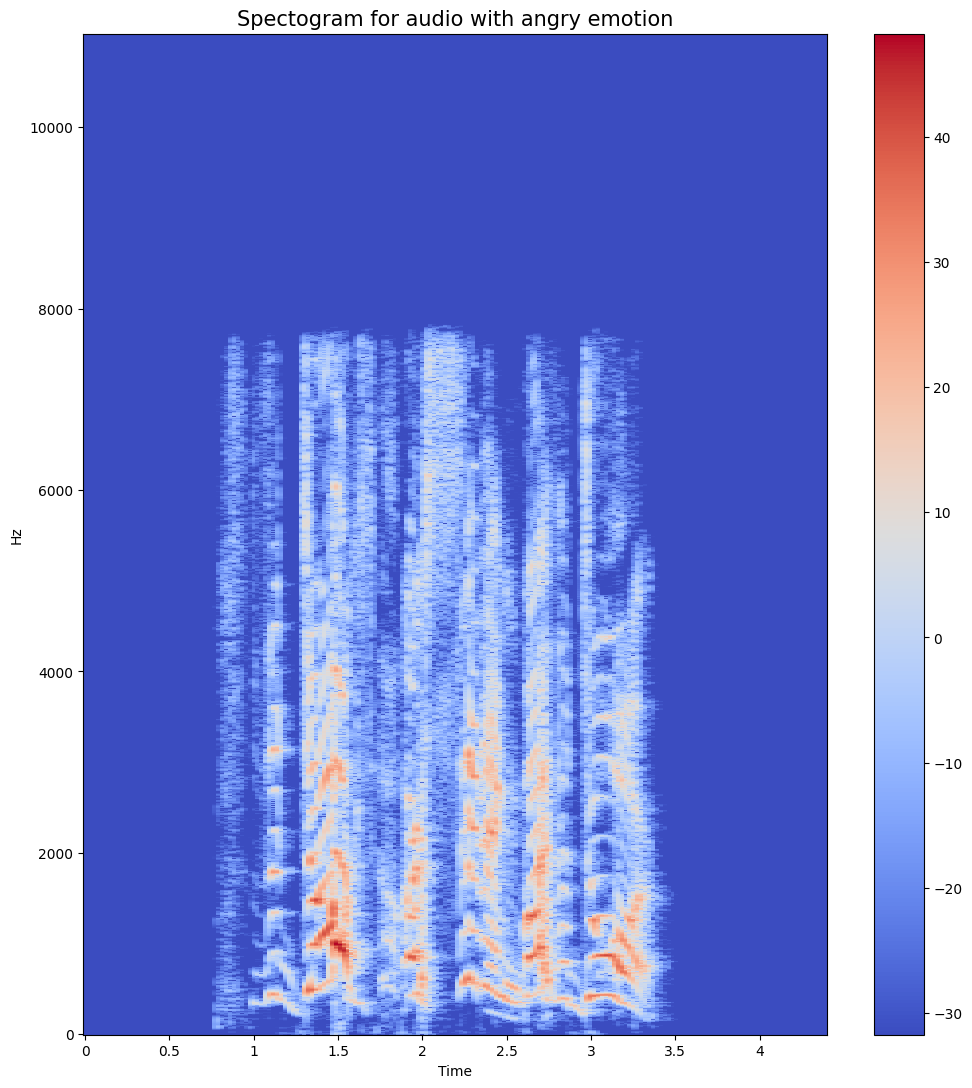

In [17]:

emotion='angry'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWaveplot(data,samplingRate,emotion)
createSpectrogram(data,samplingRate,emotion)
Audio(path)

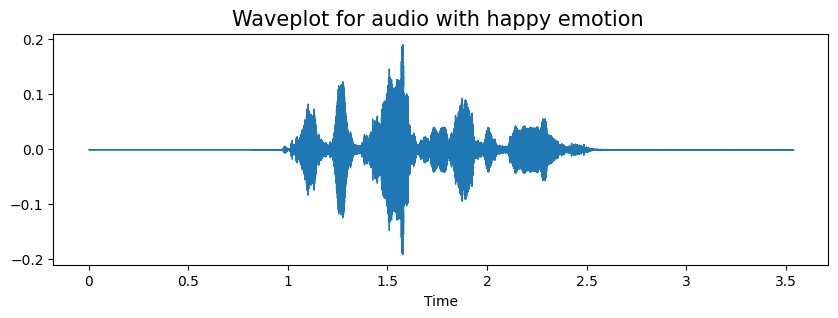

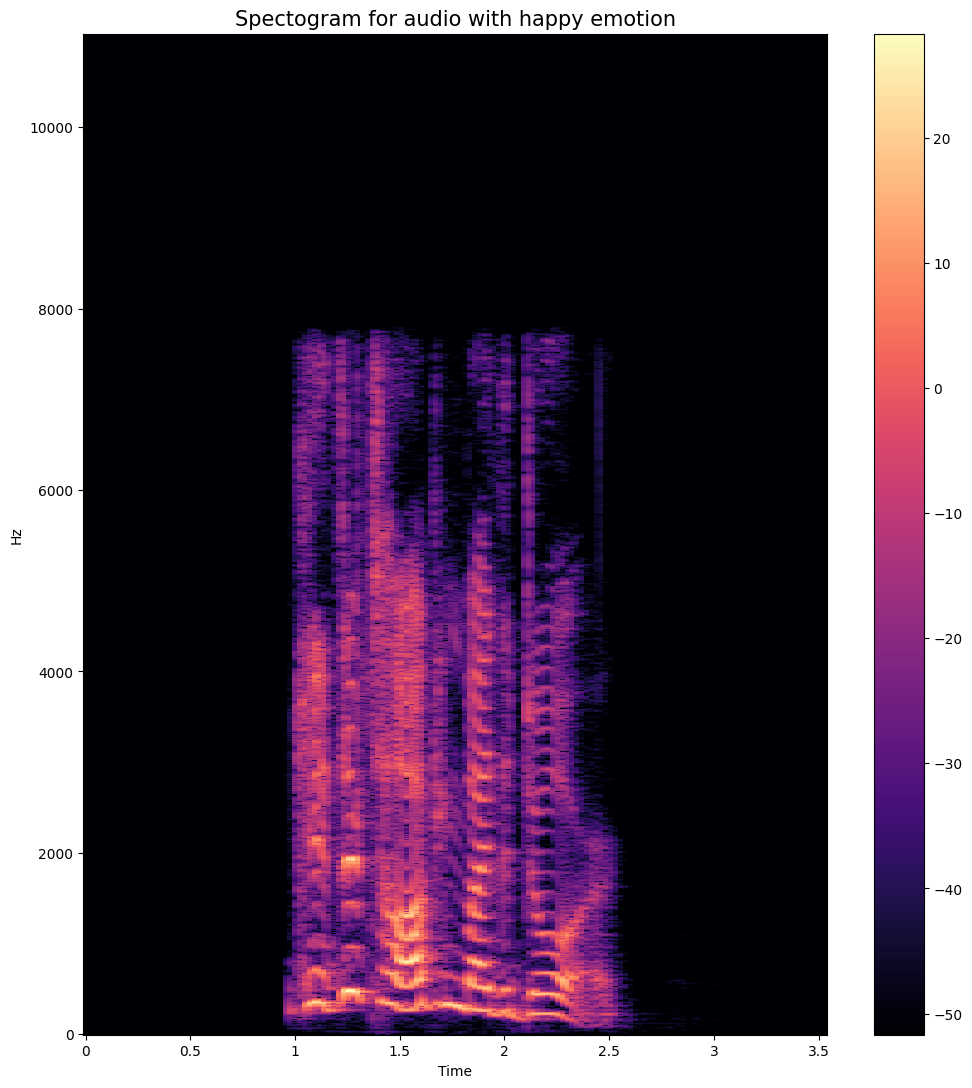

In [18]:

emotion='happy'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWaveplot(data,samplingRate,emotion)
createSpectrogram(data,samplingRate,emotion)
Audio(path)

In [19]:
def noise(data):
  noiseAmp=0.035*nup.random.uniform()*nup.amax(data)
  data=data+noiseAmp*nup.random.normal(size=data.shape[0])
  return data;

In [20]:
def stretch(data,rate=0.8):

  return librosa.effects.time_stretch(data,rate=0.8)

In [21]:
def shift(data):
  shiftRange=int(nup.random.uniform(low=5,high=5)*1000)
  return nup.roll(data,shiftRange)

In [22]:
def pitch(data,samplingRate,pitchFactor=0.7):
  return librosa.effects.pitch_shift(data,sr=samplingRate,n_steps=pitchFactor)

In [23]:
path=nup.array(dataPath.Path)[1]
data,sampleRate=librosa.load(path)


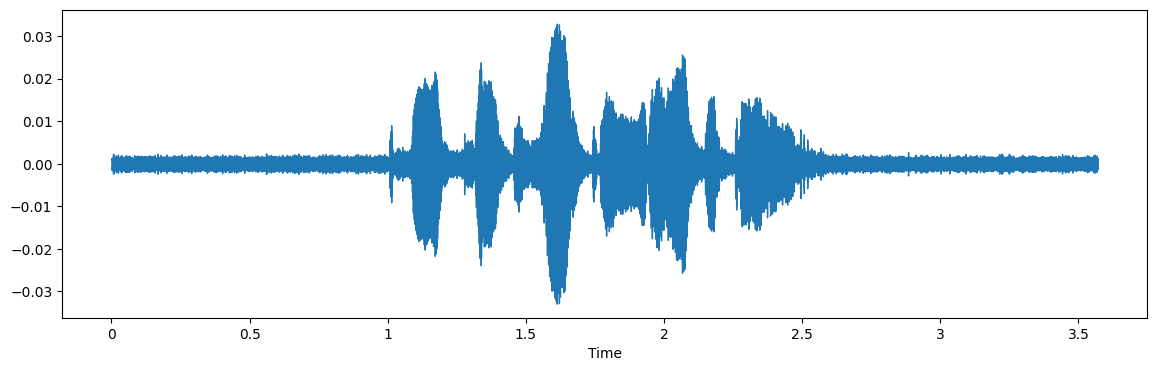

In [24]:
x=noise(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)


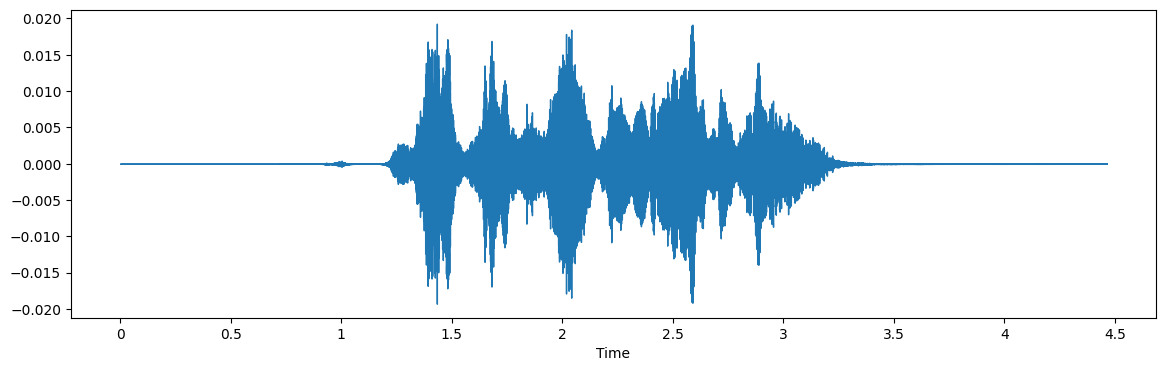

In [25]:
x=stretch(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

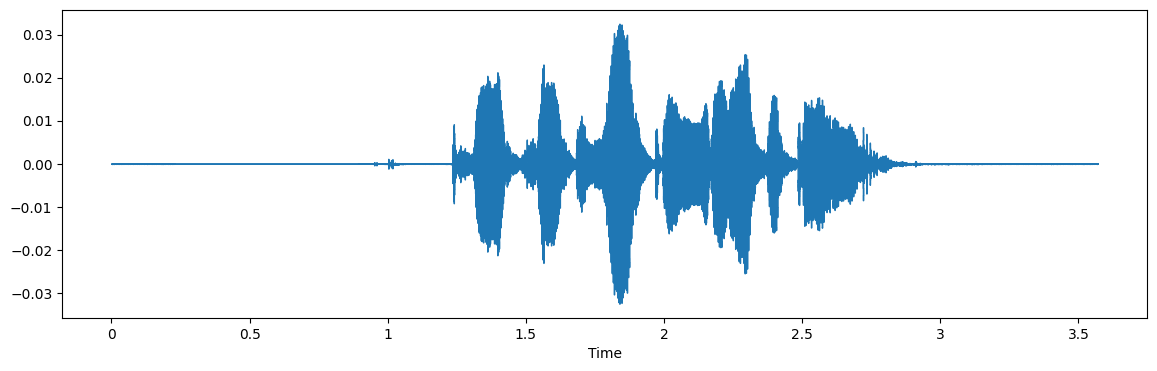

In [26]:
x=shift(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

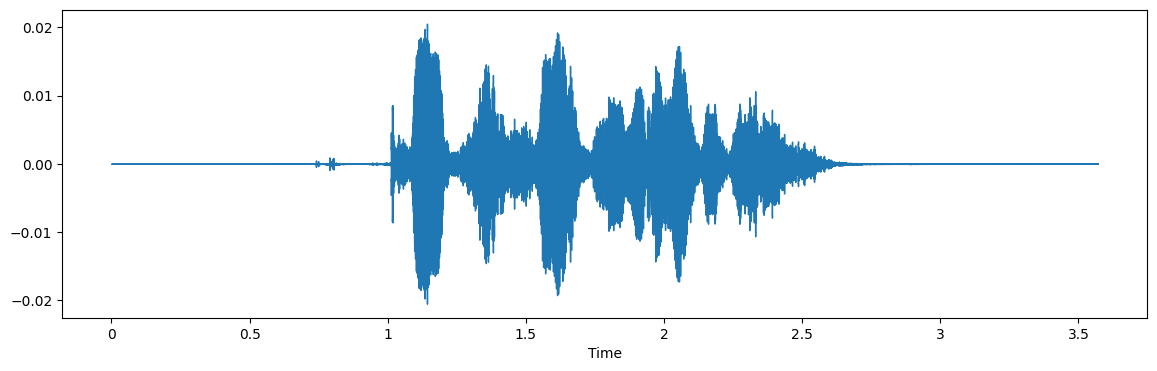

In [27]:
x = pitch(data, samplingRate, pitchFactor=0.7)
mplt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=samplingRate)
Audio(x, rate=samplingRate)

In [28]:
def extractFeature (fileName,mfcc,chroma,mel):
  with soundfile.SoundFile(fileName) as soundFile:
    X=soundFile.read(dtype='float32')
    sampleRate=soundFile.samplerate
    if chroma:
     stft=nup.abs(librosa.stft(X))

    result=nup.array([])
    if mfcc:
      mfccs=nup.mean(librosa.feature.mfcc(y=X,sr=sampleRate,n_mfcc=40).T,axis=0)
      result=nup.hstack((result,mfccs))
    if chroma:
      chroma=nup.mean(librosa.feature.chroma_stft(S=stft,sr=sampleRate).T,axis=0)
      result=nup.hstack((result,chroma))
    if mel:
      mel=nup.mean(librosa.feature.melspectrogram(y=X,sr=sampleRate).T,axis=0)
      result=nup.hstack((result,mel))
    return result


In [29]:
emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}
observedEmotions=['calm','happy','fearful','disgust']

In [30]:
def loadData(test_size=0.2):
  x,y=[],[]
  for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
    fileName=os.path.basename(file)
    emotion1=emotions[fileName.split("-")[2]]
    if emotion1 not in observedEmotions:
      continue
    feature =extractFeature(file,mfcc=True,chroma=True,mel=True)
    x.append(feature)
    y.append(emotion1)
  return train_test_split(nup.array(x),y,test_size=test_size,random_state=9)

In [31]:
xtrain,xtest,ytrain,ytest=loadData(test_size=0.23)

In [32]:
print((xtrain.shape[0],xtest.shape[0]))


(591, 177)


In [33]:
print(f'Featires extracted:{xtrain.shape[1]}')

Featires extracted:180


In [34]:
model=MLPClassifier(alpha=0.01,batch_size=256,epsilon=1e-08,hidden_layer_sizes=(300,),learning_rate='adaptive',max_iter=500)

In [35]:
model.fit(xtrain,ytrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [36]:
expected_Of_y=ytest
yPred=model.predict(xtest)

In [37]:
print(metrics.confusion_matrix(expected_Of_y,yPred))

[[44  1  1  1]
 [ 9 25  2  8]
 [ 3  1 27  6]
 [ 2  7  7 33]]


In [38]:
print(classification_report(ytest,yPred))

              precision    recall  f1-score   support

        calm       0.76      0.94      0.84        47
     disgust       0.74      0.57      0.64        44
     fearful       0.73      0.73      0.73        37
       happy       0.69      0.67      0.68        49

    accuracy                           0.73       177
   macro avg       0.73      0.73      0.72       177
weighted avg       0.73      0.73      0.72       177



In [39]:
accuracy=accuracy_score(y_true=ytest,y_pred=yPred)

In [40]:
print("Accuracy:{:.2f}%".format(accuracy*100))

Accuracy:72.88%


In [41]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [42]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [43]:
svm_model = SVC(kernel='linear', C=1.0, gamma='auto', random_state=9)

In [44]:
svm_model.fit(xtrain, ytrain)


SVC(gamma='auto', kernel='linear', random_state=9)

In [45]:
y_pred = svm_model.predict(xtest)


In [46]:
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))

Confusion Matrix:
 [[41  5  1  0]
 [ 5 30  6  3]
 [ 3  4 26  4]
 [ 5 14  6 24]]

Classification Report:
               precision    recall  f1-score   support

        calm       0.76      0.87      0.81        47
     disgust       0.57      0.68      0.62        44
     fearful       0.67      0.70      0.68        37
       happy       0.77      0.49      0.60        49

    accuracy                           0.68       177
   macro avg       0.69      0.69      0.68       177
weighted avg       0.70      0.68      0.68       177



In [47]:
accuracy_svm = metrics.accuracy_score(y_true=ytest, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))

Accuracy: 68.36%


In [48]:
import matplotlib.pyplot as plt


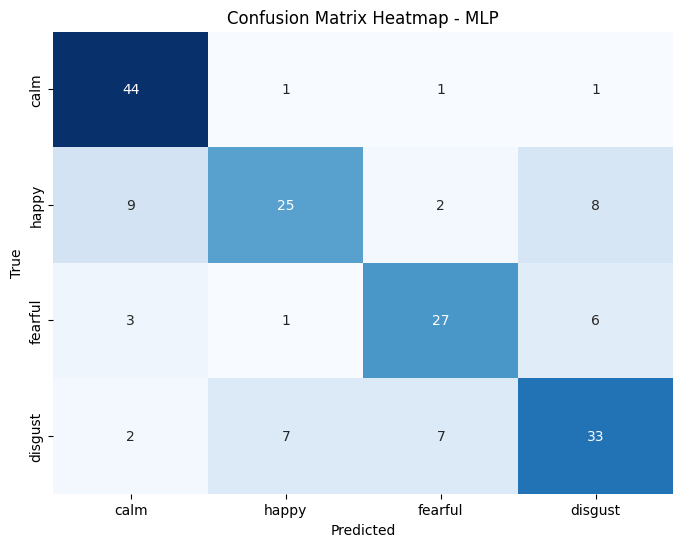

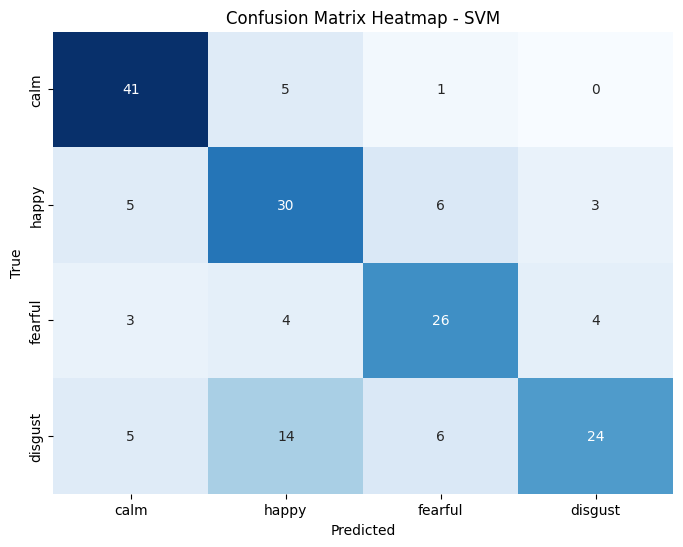

In [49]:
import seaborn as sns

# Function to plot confusion matrix heatmap
def plot_confusion_matrix_heatmap(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=observedEmotions, columns=observedEmotions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix Heatmap - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# MLP model confusion matrix heatmap
plot_confusion_matrix_heatmap(ytest, yPred, 'MLP')

# SVM model confusion matrix heatmap
plot_confusion_matrix_heatmap(ytest, y_pred, 'SVM')


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [52]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(xtrain_scaled, ytrain)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn_model.predict(xtest_scaled)

In [54]:
accuracy_knn = accuracy_score(y_true=ytest, y_pred=y_pred_knn)

In [55]:
print(f"KNN Model Accuracy: {accuracy_knn * 100:.2f}%")

KNN Model Accuracy: 63.84%


In [56]:
import matplotlib.pyplot as plt

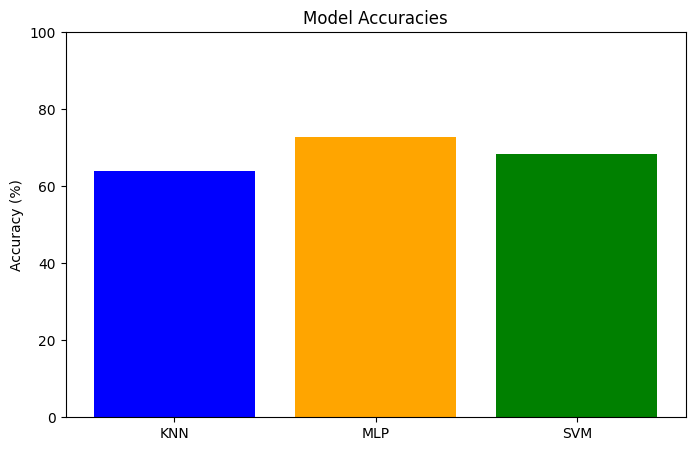

In [57]:
# Accuracy values
accuracies = [accuracy * 100 for accuracy in [accuracy_knn, accuracy, accuracy_svm]]

# Model names
models = ['KNN', 'MLP', 'SVM']

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim([0, 100])
plt.show()
